# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [51]:
import pandas as pd
import numpy as np

In [4]:

tae = pd.read_csv('twitter-archive-enhanced.csv')
tae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [26]:
import requests

response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

with open("image-predictions.tsv", "wb") as file:
    file.write(response.content)

ip  = pd.read_csv('image-predictions.tsv', sep='\t')

In [27]:
ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [22]:
import json

# Open the tweet_json.txt file
with open('tweet-json.txt', 'r') as file:
    data = []

    # Read each line of the file
    for line in file:
        tweet = json.loads(line)
        
        # Extract the required information from the tweet
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']

        # Append the data to the list
        data.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})

# Create a DataFrame from the data list
tw = pd.DataFrame(data, columns=['tweet_id', 'retweet_count', 'favorite_count'])
tw.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [31]:
from IPython.display import FileLink

tae.to_excel('tae.xlsx', index=False)
FileLink('tae.xlsx')


/workspace/home/tae.xlsx

In [36]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [43]:
duplicate_rows = tae[tae['tweet_id'].duplicated()]

print(duplicate_rows)

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


In [49]:
tae.query('rating_denominator  != 10').count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

In [33]:
ip.to_excel('ip.xlsx', index=False)
FileLink('ip.xlsx')

/workspace/home/ip.xlsx

In [34]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
duplicate_rows = ip[ip['tweet_id'].duplicated()]

print(duplicate_rows)

In [37]:
tw.to_excel('tw.xlsx', index=False)
FileLink('tw.xlsx')

/workspace/home/tw.xlsx

In [38]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [44]:
duplicate_rows = tw[tw['tweet_id'].duplicated()]

print(duplicate_rows)

Empty DataFrame
Columns: [tweet_id, retweet_count, favorite_count]
Index: []


### Quality issues

1.twitter-archive-enhanced.csv name, doggo, floofer, pupper and puppo columns have 'None' populated insteed of null 

2.twitter-archive-enhanced.csv source has unneeded html

3.all three files have tweet_ids stored as integers, convert to object

4.twitter-archive-enhanced.csv some invalid denominator should all be ten

5.twitter-archive-enhanced.csv incorrect names (eg.'a','the')

6.twitter-archive-enhanced.csv timestamp stored as object not date format

7.twitter-archive-enhanced.csv multiple stages listed for a handfull of rows

8.twitter-archive-enhanced.csv includes retweets need to be removed

### Tidiness issues
1. stage is represented in 4 different columns, we will want to combine them to analyze

2. prediction data is represented in multiple columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [47]:
# Make copies of original pieces of data
tae_copy = tae.copy()
ip_copy = ip.copy()
tw_copy = tw.copy()

### twitter-archive-enhanced.csv name, doggo, floofer, pupper and puppo columns have 'None' populated instead of null

#### Define:
we will replace the values of 'None' with null in these fields

#### Code

In [149]:
# Replace "None" with null values in 'Column1' and 'Column2'
columns_to_replace = ['name', 'doggo', 'floofer', 'pupper','puppo']
tae[columns_to_replace] = tae[columns_to_replace].replace("None", np.nan)


#### Test

In [150]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          1541 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](1), f

### twitter-archive-enhanced.csv source has unneeded html

#### Define
source contains values in HTML anchor tag format.The task is to extract the succinct source information from the HTML tags and store it separately.

#### Code

In [151]:
!pip install beautifulsoup4

In [152]:
from bs4 import BeautifulSoup
def extract_source(value):
    soup = BeautifulSoup(value, 'html.parser')
    return soup.get_text()

# Apply the function to the source column
tae['source'] = df['source'].apply(extract_source)


#### Test

In [153]:
tae['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### all three files have tweet_ids stored as integers, convert to object

#### Define
change id fields to objects

#### Code

In [154]:
tae['tweet_id'] = tae['tweet_id'].astype(str)
ip['tweet_id'] = ip['tweet_id'].astype(str)
tw['tweet_id'] = tw['tweet_id'].astype(str)

#### Test

In [155]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          1541 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](1), f

In [156]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [157]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### twitter-archive-enhanced.csv some invalid denominator should all be ten

#### Define
the majority of rating denominator are ten, even though the numerator is often more than ten. we will convert all denomin ators to ten and adjust the numerator so that the ratio is preserved we will first change any 0 denominator values to 10 without changing the numerator to avoid creating infinite numerators

#### Code

In [158]:
# Change denominator to 10 if it is currently 0
tae.loc[tae['rating_denominator'] == 0, 'rating_denominator'] = 10

# Create a mask for rows where denominator is not 10
mask = tae['rating_denominator'] != 10

# Update 'denominator' to 10 for rows where it is not 10
tae.loc[mask, 'rating_denominator'] = 10

# Adjust 'numerator' to preserve the ratio
tae.loc[mask, 'rating_numerator'] = tae.loc[mask, 'rating_numerator'] * (10 / tae.loc[mask, 'rating_denominator'])

#### Test

In [159]:
tae .describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.0
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.0
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,0.0
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,10.0
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.0
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.0
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.0
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,10.0


### twitter-archive-enhanced.csv incorrect names (eg.'a','the')

#### Define
we will convert any invalid names from specified list of invalid values to null

#### Code

In [160]:
#count records by genre to find most common
dfg = tae.groupby('name')['tweet_id'].count()
dfg=dfg.reset_index()
dfg = dfg.sort_values(by='tweet_id',ascending=False)
dfg

,name,tweet_id
167,Charlie,12
634,Oliver,11
542,Lucy,11
206,Cooper,11
659,Penny,10
884,Tucker,10
530,Lola,10
99,Bo,9
916,Winston,9
748,Sadie,8


In [161]:
invalid_values = ['the','a','an']

# Convert single characters and invalid values to null
tae.loc[(tae['name'].isin(invalid_values)), 'name'] = np.nan

#### Test

In [162]:
dfg = tae.groupby('name')['tweet_id'].count()
dfg=dfg.reset_index()
dfg = dfg.sort_values(by='tweet_id',ascending=False)
dfg

,name,tweet_id
167,Charlie,12
634,Oliver,11
542,Lucy,11
206,Cooper,11
659,Penny,10
884,Tucker,10
530,Lola,10
99,Bo,9
916,Winston,9
748,Sadie,8


### twitter-archive-enhanced.csv timestamp stored as object not date format

#### Define
we will convert timestamp to a date data type

#### Code

In [163]:
tae['timestamp'] = pd.to_datetime(tae['timestamp'])

#### Test

In [164]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          1541 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](1), f

### twitter-archive-enhanced.csv multiple stages listed for a handfull of rows

#### Define
we will want to combine this to one field so we will clean this up so only 1 stage is defined

#### Code

In [165]:
non_null_count = tae[['doggo', 'floofer', 'pupper', 'puppo']].notnull().sum(axis=1)
filtered_df = tae[non_null_count > 1]
filtered_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [166]:
tae.loc[tae['pupper'].notnull(), ['doggo', 'floofer', 'puppo']] = np.nan
tae.loc[tae['floofer'].notnull(), ['doggo', 'pupper', 'puppo']] = np.nan
tae.loc[tae['puppo'].notnull(), ['doggo', 'pupper', 'floofer']] = np.nan
tae.loc[tae['doggo'].notnull(), ['puppo', 'pupper', 'floofer']] = np.nan

#### Test

In [167]:
non_null_count = tae[['doggo', 'floofer', 'pupper', 'puppo']].notnull().sum(axis=1)
filtered_df = tae[non_null_count > 1]
filtered_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### twitter-archive-enhanced.csv includes retweets need to be removed

#### Define
we will drop all the rows where the retweeted status is not null

In [168]:
tae = tae[tae['retweeted_status_id'].isnull()]

#### Test

In [170]:
filtered_df = tae[tae['retweeted_status_id'].notnull()]
filtered_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


###  stage is represented in 4 different columns, we will want to combine them to analyze

#### Define
we will want to analyze the data based on stage which will work better in a single column we will combine the 4 stage fields into a single column

#### Code

In [178]:
tae['stage'] = tae['doggo'].fillna('') + tae['floofer'].fillna('') + tae['pupper'].fillna('') + tae['puppo'].fillna('')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [180]:
dfg = tae.groupby('stage')['tweet_id'].count()
dfg=dfg.reset_index()
dfg = dfg.sort_values(by='tweet_id',ascending=False)
dfg

,stage,tweet_id
0,,1831
3,pupper,234
1,doggo,75
4,puppo,25
2,floofer,10


### prediction data is represented in multiple columns

#### Define
we need to combine these fields into a single field each for predicted dog and confidence interval, and if all p_dog fields are not true, we will populate the predicted_dog field with 'not a dog'

#### Code

In [182]:
# Define a function to extract predicted dog and confidence interval based on the three levels of prediction
def extract_predicted(row):
    if row['p1_dog']:
        return row['p1'], row['p1_conf']
    elif row['p2_dog']:
        return row['p2'], row['p2_conf']
    elif row['p3_dog']:
        return row['p3'], row['p3_conf']
    else:
        return 'not a dog', 0

# Apply the function to create 'predicted_dog' and 'predicted_conf' columns
ip[['predicted_dog', 'predicted_conf']] = ip.apply(extract_predicted, axis=1, result_type='expand')


#### Test

In [189]:
dfg = ip.groupby(['predicted_dog'])['tweet_id'].count()
dfg= dfg.reset_index()
dfg = dfg.sort_values(by='tweet_id',ascending=False)
dfg

,predicted_dog,tweet_id
100,not a dog,324
89,golden_retriever,173
37,Labrador_retriever,113
49,Pembroke,96
16,Chihuahua,95
102,pug,65
109,toy_poodle,52
81,chow,51
55,Samoyed,46
50,Pomeranian,42


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [195]:
# Merge tae and ip DataFrames based on 'tweet_id'
merged_df = pd.merge(tae, ip, on='tweet_id')

# Merge the merged_df and tw DataFrames based on 'tweet_id'
final_df = pd.merge(merged_df, tw, on='tweet_id')

In [196]:
final_df = final_df.filter(['tweet_id','timestamp','source','rating_numerator','name','stage','predicted_dog','predicted_conf','retweet_count','favorite_count'])

In [197]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 10 columns):
tweet_id            1994 non-null object
timestamp           1994 non-null datetime64[ns]
source              1994 non-null object
rating_numerator    1994 non-null float64
name                1380 non-null object
stage               1994 non-null object
predicted_dog       1994 non-null object
predicted_conf      1994 non-null float64
retweet_count       1994 non-null int64
favorite_count      1994 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 171.4+ KB


In [ ]:
final_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
grouped_df = final_df.groupby('predicted_dog').agg({'rating_numerator': 'mean', 'retweet_count': 'sum', 'favorite_count': 'sum'})
grouped_df

,rating_numerator,retweet_count,favorite_count
predicted_dog,,,
Afghan_hound,9.666667,17928,51980
Airedale,9.833333,16725,63370
American_Staffordshire_terrier,10.312500,36973,150083
Appenzeller,11.000000,2916,14635
Australian_terrier,11.500000,6157,22255
Bedlington_terrier,10.333333,45061,126919
Bernese_mountain_dog,11.272727,17782,80124
Blenheim_spaniel,11.100000,25833,92809
Border_collie,10.583333,26493,107197


In [201]:
highest_ratings = grouped_df.sort_values(by='rating_numerator', ascending=False)
highest_ratings

,rating_numerator,retweet_count,favorite_count
predicted_dog,,,
clumber,27.000000,1885,7320
soft-coated_wheaten_terrier,20.800000,15719,50101
not a dog,16.698052,767245,2171054
West_Highland_white_terrier,14.687500,23592,96876
Great_Pyrenees,14.666667,68008,186847
chow,14.166667,131025,446933
Labrador_retriever,13.638889,407573,1274526
borzoi,13.545455,18259,58004
Siberian_husky,13.250000,34382,139982


In [202]:
highest_retweets = grouped_df.sort_values(by='retweet_count', ascending=False)
highest_retweets

,rating_numerator,retweet_count,favorite_count
predicted_dog,,,
not a dog,16.698052,767245,2171054
golden_retriever,13.000000,587528,1946934
Labrador_retriever,13.638889,407573,1274526
Pembroke,11.410526,292052,1039484
Chihuahua,10.516484,251807,746604
Samoyed,11.690476,203446,583906
French_bulldog,11.193548,156230,570921
cocker_spaniel,11.333333,145743,407412
chow,14.166667,131025,446933


In [204]:
highest_favorites = grouped_df.sort_values(by='favorite_count', ascending=False)
highest_favorites

,rating_numerator,retweet_count,favorite_count
predicted_dog,,,
not a dog,16.698052,767245,2171054
golden_retriever,13.000000,587528,1946934
Labrador_retriever,13.638889,407573,1274526
Pembroke,11.410526,292052,1039484
Chihuahua,10.516484,251807,746604
Samoyed,11.690476,203446,583906
French_bulldog,11.193548,156230,570921
chow,14.166667,131025,446933
cocker_spaniel,11.333333,145743,407412


In [208]:
correlation = grouped_df[['rating_numerator', 'retweet_count', 'favorite_count']].corr()
correlation

,rating_numerator,retweet_count,favorite_count
rating_numerator,1.000000,0.260224,0.253544
retweet_count,0.260224,1.000000,0.994987
favorite_count,0.253544,0.994987,1.000000


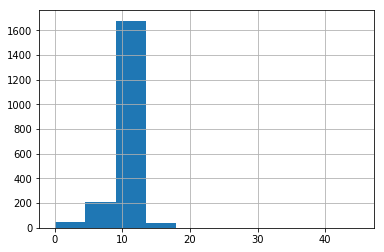

In [211]:
final_df.query('rating_numerator < 50').rating_numerator.hist()

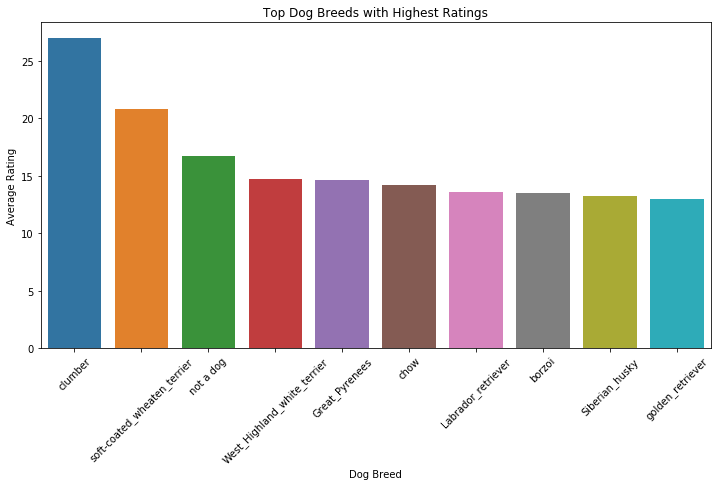

In [203]:
plt.figure(figsize=(12, 6))
sns.barplot(data=highest_ratings.head(10), x=highest_ratings.head(10).index, y='rating_numerator')
plt.xlabel('Dog Breed')
plt.ylabel('Average Rating')
plt.title('Top Dog Breeds with Highest Ratings')
plt.xticks(rotation=45)
plt.show()


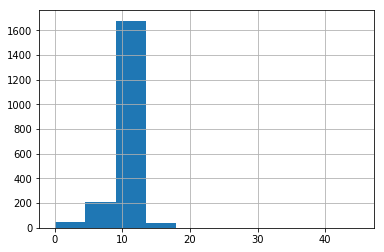

In [212]:
final_df.query('rating_numerator < 50').rating_numerator.hist()

In [213]:
grouped_df2 = final_df.query('rating_numerator < 50').groupby('predicted_dog').agg({'rating_numerator': 'mean', 'retweet_count': 'sum', 'favorite_count': 'sum'})
highest_ratings2 = grouped_df2.sort_values(by='rating_numerator', ascending=False)


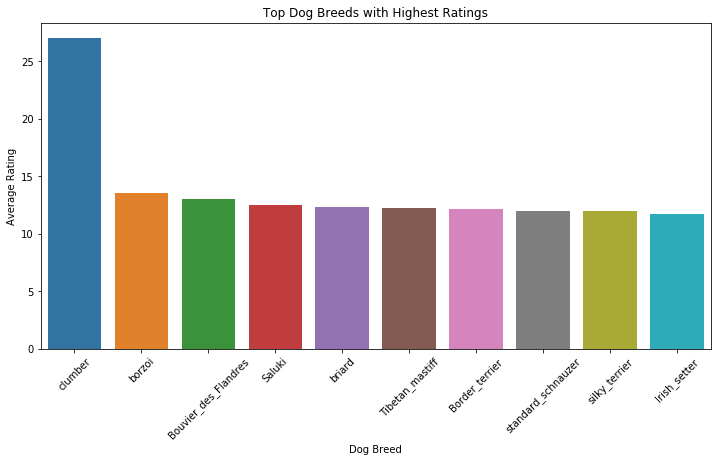

In [214]:
plt.figure(figsize=(12, 6))
sns.barplot(data=highest_ratings2.head(10), x=highest_ratings2.head(10).index, y='rating_numerator')
plt.xlabel('Dog Breed')
plt.ylabel('Average Rating')
plt.title('Top Dog Breeds with Highest Ratings')
plt.xticks(rotation=45)
plt.show()

after removing extreme outliers in the ratings clumber still averages the highest ratings, but shifts the rankings significantly for other breeds including dropping pictures that do not seem to be a dog based on our prediction data. I suspect user post silly high ratings on non dog pictures to be funny

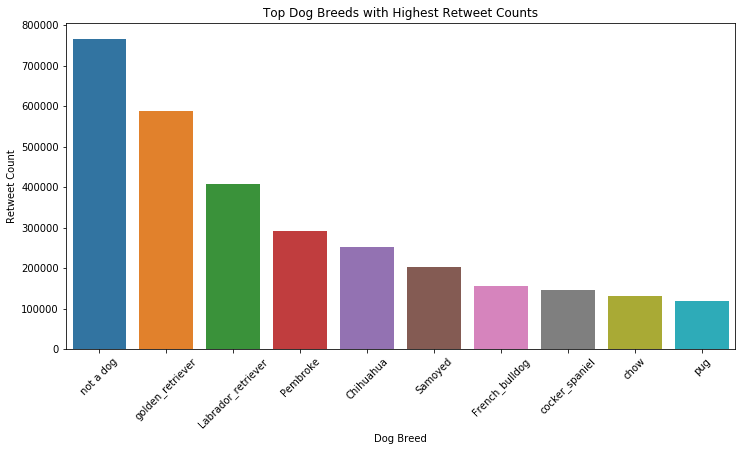

In [215]:
plt.figure(figsize=(12, 6))
sns.barplot(data=highest_retweets.head(10), x=highest_retweets.head(10).index, y='retweet_count')
plt.xlabel('Dog Breed')
plt.ylabel('Retweet Count')
plt.title('Top Dog Breeds with Highest Retweet Counts')
plt.xticks(rotation=45)
plt.show()


In [221]:
top_retweets_not_dog = final_df.query('predicted_dog == "not a dog"').sort_values(by='retweet_count', ascending=False)
top_retweets_not_dog.head()

,tweet_id,timestamp,source,rating_numerator,name,stage,predicted_dog,predicted_conf,retweet_count,favorite_count
637,761672994376806400,2016-08-05 21:19:27,Twitter for iPhone,10.0,NaN,,not a dog,0.0,33421,55016
332,819006400881917954,2017-01-11 02:21:57,Twitter for iPhone,14.0,Sunny,doggo,not a dog,0.0,21794,49960
962,711694788429553666,2016-03-20 23:23:54,Twitter for iPhone,13.0,NaN,,not a dog,0.0,20500,35865
411,804026241225523202,2016-11-30 18:16:08,Twitter for iPhone,13.0,Bo,,not a dog,0.0,18876,49774
634,762035686371364864,2016-08-06 21:20:40,Twitter for iPhone,14.0,NaN,,not a dog,0.0,17919,35400


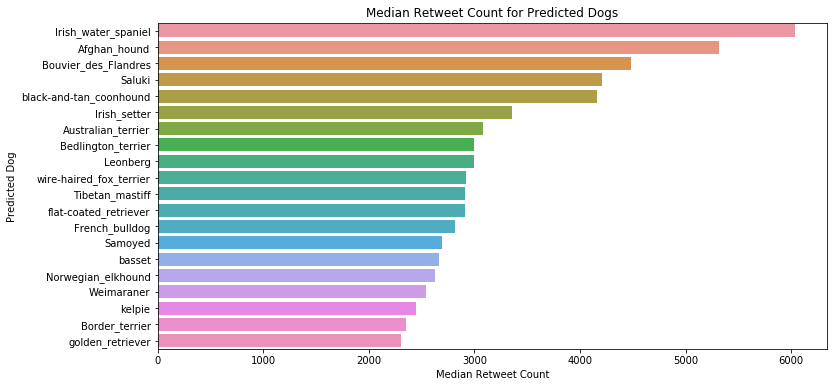

In [224]:
median_retweet = final_df.groupby('predicted_dog')['retweet_count'].median().reset_index()

median_retweet_sorted = median_retweet.sort_values(by='retweet_count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=median_retweet_sorted.head(20), x='retweet_count', y='predicted_dog')
plt.xlabel('Median Retweet Count')
plt.ylabel('Predicted Dog')
plt.title('Median Retweet Count for Predicted Dogs')
plt.show()

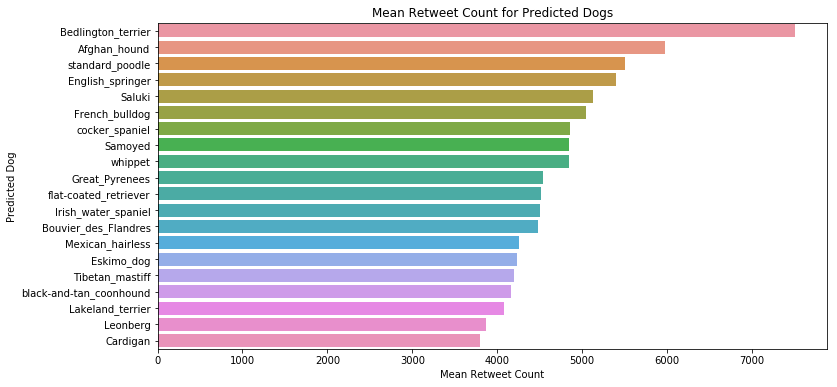

In [225]:
mean_retweet = final_df.groupby('predicted_dog')['retweet_count'].mean().reset_index()

mean_retweet_sorted = mean_retweet.sort_values(by='retweet_count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_retweet_sorted.head(20), x='retweet_count', y='predicted_dog')
plt.xlabel('Mean Retweet Count')
plt.ylabel('Predicted Dog')
plt.title('Mean Retweet Count for Predicted Dogs')
plt.show()

### Insights:
1. The dog breed "clumber" has the highest average rating of 27.0, indicating it received the highest ratings among all the dog breeds present in the dataset. this rating holds true when excluding extremely high ratings (>50). interesting that many other dog breeds drop on the list without the outliers

2. Pictures that the neural network predicted were not of dogs had the highest retweet counts. perhaps silly pictures that are out of place for the topic of the page garner the most retweets. Mean and median based ranking of retweets show very different results

3. Overall, the correlation coefficients indicate that there is a weak positive relationship between the rating numerator and both the retweet count and favorite count. Additionally, the retweet count and favorite count have a very strong positive correlation, suggesting that users tend to favorite and retweet the same posts. Also interesting that the retweets and favorites

### Visualization

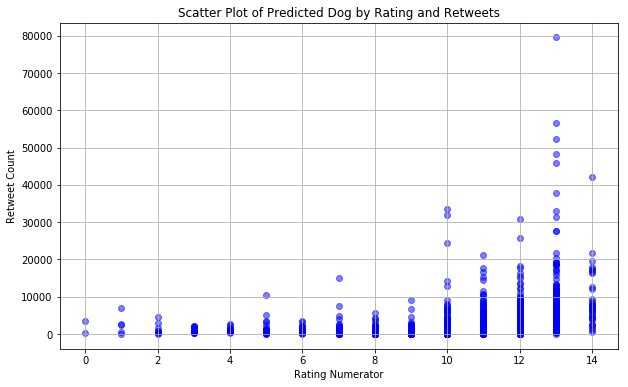

In [229]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df.query('rating_numerator < 20')['rating_numerator'], final_df.query('rating_numerator < 20')['retweet_count'], c='blue', alpha=0.5)
plt.xlabel('Rating Numerator')
plt.ylabel('Retweet Count')
plt.title('Scatter Plot of Predicted Dog by Rating and Retweets')
plt.grid(True)
plt.show()